Bei diesem Modell ist es leider deutlich schwieriger als bei dem vorhergehenden. Weshalb es in der Webapp auch nur als zusätzlich Option eingebunden wird. Das Probllem ist das die Daten, im Gegensatz zu denen beim Lüften keine klare Kurve ergeben:

<AxesSubplot:xlabel='local time', ylabel='humidity_bathroom_middle'>

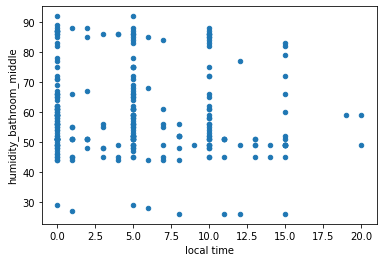

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("dush.csv", sep=";")
data["humidity_bathroom_middle"] = pd.to_numeric(data["humidity_bathroom_middle"], errors="coerce")
data.plot.scatter(x="local time", y="humidity_bathroom_middle")

Man sieht das die Werte zwar schon von Anfang an deutlich über den kritischen 65% liegen können, aber gleichzeitig gibt es ganz viele Punkte die auch niedriger liegen ohne das es sich auf Dauer ausdünnen würde. Die durchschnittliche Luftfeuchtigkeit ist allerdings höher als die der Gesamtdaten:

In [2]:
all_data = pd.read_csv("data_bll.csv", sep=";")
all_data["humidity_bathroom_middle"] = pd.to_numeric(all_data["humidity_bathroom_middle"], errors="coerce")
print("Über alle Daten hinweg:", all_data["humidity_bathroom_middle"].describe()["mean"])
print("Während des Duschens:", data["humidity_bathroom_middle"].describe()["mean"])

Über alle Daten hinweg: 57.518542726420186
Während des Duschens: 59.33955223880597


Allerdings sind die Unterschiede marginal. Hier mal ein Beispielverlauf beim Duschen:

<AxesSubplot:xlabel='local time', ylabel='humidity_bathroom_middle'>

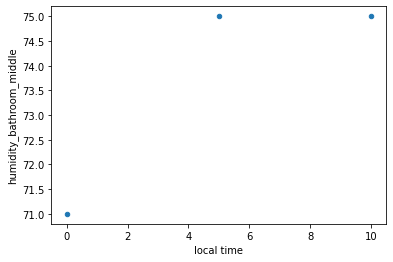

In [3]:
data[data["Id"]==14].plot.scatter(x="local time", y="humidity_bathroom_middle")

Das sind nicht viele Datenpunkte für einen Duschvorgang. Das Problem dabei ist das ursprünglich statt bei jedem neuen Wert alle 5 Minuten der Wert in eine Datei geschrieben wurde. Deshalb mussten neue Messungen vorgenommen werden, mit einer verbesserten Methode (footnote). Mit diesen Daten sieht es so aus:

<AxesSubplot:xlabel='local time', ylabel='humidity'>

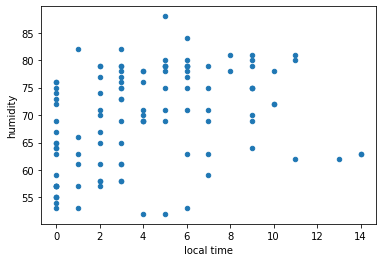

In [11]:
import pandas as pd
data = pd.read_csv("shower.csv", sep=";")
data.plot.scatter(x="local time", y="humidity")

Es ist schon eher ein Trend erkennbar, allerdings gibt es immernoch viele Außreißer. Hier wird angenommen das sich das durch mehrere Faktoren ergibt: 1-2 Duschvorgänge könnten durch einen menschlichen Fehler falsch sein, wo bspw. die Zeit falsch aufgeschrieben wurde. Es ist natürlich nicht möglich das zu verifizieren. Ein deutlich größerer Teil dürfte daran liegen das bei Duschen sehr schnell sehr viel Luftfeuchtigkeit entsteht, welche sich erstmal langsam verteilen muss was zu so ungleichen Verteilungen führen kann. Das ist natürlich reine Spekulation. Der Grund warum man so etwas nicht bei den Lüftungsdaten sieht ist die deutlich geringere zeitliche Auflösung.

Weitere Faktoren könnten sein das wenn man duscht ja nicht die ganze Zeit Wasser läuft, damit könnte man vllt. den Knick bei Minute 4-8 erklären.

Gleichzeitig soll diese Funktion von möglichst wenig Parametern abhängen, gefragt wird wie lange haben Sie sich eingeseift, auf welcher Temperatur haben sie geduscht und mit welcher Strahlstärke ist es nicht hilfreich. Deshalb wird hier nur ein sehr simples Modell erstellt was, wenn es genutzt wird auf jeden Fall von einer einzigen Person mit Daten versorgt werden sollte, sodass das Modell sich an die "Duschgewohnheit" der Person gewöhnt. Als einziger vom Nutzer eingegebener Parameter soll die Duschlänge dienen. Wenn man nämlich Temperatur und Luftfeuchtigkeit vor dem Duschgang abfragt, wäre es deutlich akkurater und einfacher diese Werte nach dem Duschen abzufragen und das relative gute Lüftungsoptimierungsmodell zu verwenden.

Das ganze sieht wie eine asympthotische Funktion aus

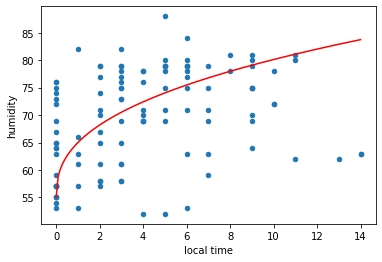

In [52]:
ax = data.plot.scatter(x="local time", y="humidity")

x = np.linspace(0,14,150)
y = 10*x**0.4+ 55
plt.plot(x,y, 'r')
plt.show()


Hier wieder eine Funktion die die Entwicklung ungefähr abbildet und nur noch an die Daten agepasst werden muss. Denn eine Verbindung mit dem Wetter außen gibt es natürlich genauso wenig wie mit den geschlossenen Fenstern. Das einzige was noch eine Rolle spielt ist die Raumgröße.

$f(t) = a_0*t^{a_1} + a_2$

Wobei a_2 der Anfangswert wäre, ähnlich wie beim Fenstermodell. Nur wird dieser Wert nicht übergeben womit das Modell relativ wertlos ist. Dasselbe gilt für den Vorfaktor, welcher den letzten Punkt (Beim Lüften Außenluftfeuchtigkeit) abbildet.

Würde man hier aber um diese Werte bitten wäre der Zweck des Modells weg, während man beim lüften durch die Voraussage hat wann der optimale Zeitpunkt zum schließen der Fenster ist.

Mit Raumgröße im Modell ist auch hier ein dämpfender Faktor, da die Luftfeuchtigkeit im Raum mehr verteilen kann und so mehr Luftfeuchtigkeit entstehten muss um die Luftfeuchtigkeit im Gesamtraum signifikant zu stärken. Das sieht das Modell folgendermaßen aus:

$f(t) = a_0*t^{\dfrac{a_1}{a_2\cdot R_{größe}}} + a_3$